# Object Detection and Image Recognition

### input image to the neural network.  and output the bounding box , the object label name

https://docs.google.com/presentation/d/1ySpIyIgy3LdW3iC8TJ0Wma_fcYjszC7PQImHLi8AqXU/edit#slide=id.g3abf962be0_0_5

PDF for RL,Terminal for nvidia & tensorbraod,Floder for data view .

#### SalesForce AI platform : einstein

https://einstein.ai/products

https://einstein.ai/research/learned-in-translation-contextualized-word-vectors


![Illustration of the problem](deepstream.png)



### [DeepStream SDK](https://developer.nvidia.com/deepstream-sdk?ncid=em-ded-dmsk20ntl-43165)  was published by Nvidia on 20 Jun 2018 !

The new DeepStream SDK makes it easier to develop high-performance AI applications. It includes:

    •	 NVIDIA TensorRT™ and CUDA® for AI and other GPU computing tasks
    •	 Video CODEC acceleration
    •	 A graph-based architecture to create configurable processing pipelines

Best of all, it’s available today and absolutely free. 

	•	 Build modular and scalable frameworks for multi-stream, multi-DNN video analytics.
    •	 Use TensorRT to optimize deep learning inference at runtime for low latency and high throughput.
    •	 Use included sample code and pre-trained models for image classification, understanding, categorization, and filtering.
    
![Illustration of the problem](deepstream-sdk.png)

[Object Detection](https://towardsdatascience.com/object-detection-with-10-lines-of-code-d6cb4d86f606)

[imageai](https://github.com/OlafenwaMoses/ImageAI)


In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

### Loadding library

In [2]:
from pathlib import Path
import json
from PIL import ImageDraw, ImageFont
from matplotlib import patches, patheffects
from fastai.conv_learner import *
from fastai.dataset import *
torch.cuda.set_device(0)

# Data preprocessing

We will be looking at the [Pascal VOC](http://host.robots.ox.ac.uk/pascal/VOC/) dataset.

##### /home/yanhua/Documents/jupyter/fastai-master/courses/dl2/data/pascal/VOCdevkit/VOC2007

In [4]:
PATH = Path('/home/yanhua/Documents/jupyter/fastai/courses/dl2/data/pascal')
list(PATH.iterdir())

[PosixPath('/home/yanhua/Documents/jupyter/fastai/courses/dl2/data/pascal/VOCdevkit_08-Jun-2007.tar'),
 PosixPath('/home/yanhua/Documents/jupyter/fastai/courses/dl2/data/pascal/VOCdevkit_18-May-2011.tar'),
 PosixPath('/home/yanhua/Documents/jupyter/fastai/courses/dl2/data/pascal/PASCAL_VOC.zip'),
 PosixPath('/home/yanhua/Documents/jupyter/fastai/courses/dl2/data/pascal/pascal_test2007.json'),
 PosixPath('/home/yanhua/Documents/jupyter/fastai/courses/dl2/data/pascal/VOC2007_doc.pdf'),
 PosixPath('/home/yanhua/Documents/jupyter/fastai/courses/dl2/data/pascal/pascal_train2012.json'),
 PosixPath('/home/yanhua/Documents/jupyter/fastai/courses/dl2/data/pascal/VOCtrainval_11-May-2012.tar'),
 PosixPath('/home/yanhua/Documents/jupyter/fastai/courses/dl2/data/pascal/VOCtrainval_06-Nov-2007.tar'),
 PosixPath('/home/yanhua/Documents/jupyter/fastai/courses/dl2/data/pascal/models'),
 PosixPath('/home/yanhua/Documents/jupyter/fastai/courses/dl2/data/pascal/PASCAL_VOC'),
 PosixPath('/home/yanhua/Docum

#### loadding the json file for images information.

In [5]:
trn_j = json.load((PATH/'pascal_train2007.json').open())
trn_j.keys()

dict_keys(['images', 'type', 'annotations', 'categories'])

image , annotations, categories information.

image

In [6]:
IMAGES,ANNOTATIONS,CATEGORIES = ['images', 'annotations', 'categories']
trn_j[IMAGES][:5]

[{'file_name': '000012.jpg', 'height': 333, 'id': 12, 'width': 500},
 {'file_name': '000017.jpg', 'height': 364, 'id': 17, 'width': 480},
 {'file_name': '000023.jpg', 'height': 500, 'id': 23, 'width': 334},
 {'file_name': '000026.jpg', 'height': 333, 'id': 26, 'width': 500},
 {'file_name': '000032.jpg', 'height': 281, 'id': 32, 'width': 500}]

Detail information about bounding box etc...

In [7]:
trn_j[ANNOTATIONS][:2]

[{'area': 34104,
  'bbox': [155, 96, 196, 174],
  'category_id': 7,
  'id': 1,
  'ignore': 0,
  'image_id': 12,
  'iscrowd': 0,
  'segmentation': [[155, 96, 155, 270, 351, 270, 351, 96]]},
 {'area': 13110,
  'bbox': [184, 61, 95, 138],
  'category_id': 15,
  'id': 2,
  'ignore': 0,
  'image_id': 17,
  'iscrowd': 0,
  'segmentation': [[184, 61, 184, 199, 279, 199, 279, 61]]}]

categories information 

In [8]:
trn_j[CATEGORIES][:2]

[{'id': 1, 'name': 'aeroplane', 'supercategory': 'none'},
 {'id': 2, 'name': 'bicycle', 'supercategory': 'none'}]

In [9]:
FILE_NAME,ID,IMG_ID,CAT_ID,BBOX = 'file_name','id','image_id','category_id','bbox'

cats = {o[ID]:o['name'] for o in trn_j[CATEGORIES]}
trn_fns = {o[ID]:o[FILE_NAME] for o in trn_j[IMAGES]}
trn_ids = [o[ID] for o in trn_j[IMAGES]]

these XML files

In [10]:
list((PATH/'VOCdevkit'/'VOC2007').iterdir())

[PosixPath('/home/yanhua/Documents/jupyter/fastai/courses/dl2/data/pascal/VOCdevkit/VOC2007/JPEGImages'),
 PosixPath('/home/yanhua/Documents/jupyter/fastai/courses/dl2/data/pascal/VOCdevkit/VOC2007/ImageSets'),
 PosixPath('/home/yanhua/Documents/jupyter/fastai/courses/dl2/data/pascal/VOCdevkit/VOC2007/Annotations'),
 PosixPath('/home/yanhua/Documents/jupyter/fastai/courses/dl2/data/pascal/VOCdevkit/VOC2007/SegmentationClass'),
 PosixPath('/home/yanhua/Documents/jupyter/fastai/courses/dl2/data/pascal/VOCdevkit/VOC2007/SegmentationObject')]

In [11]:
JPEGS = 'VOCdevkit/VOC2007/JPEGImages'

In [12]:
IMG_PATH = PATH/JPEGS
list(IMG_PATH.iterdir())[:5]

[PosixPath('/home/yanhua/Documents/jupyter/fastai/courses/dl2/data/pascal/VOCdevkit/VOC2007/JPEGImages/004066.jpg'),
 PosixPath('/home/yanhua/Documents/jupyter/fastai/courses/dl2/data/pascal/VOCdevkit/VOC2007/JPEGImages/002723.jpg'),
 PosixPath('/home/yanhua/Documents/jupyter/fastai/courses/dl2/data/pascal/VOCdevkit/VOC2007/JPEGImages/000834.jpg'),
 PosixPath('/home/yanhua/Documents/jupyter/fastai/courses/dl2/data/pascal/VOCdevkit/VOC2007/JPEGImages/001904.jpg'),
 PosixPath('/home/yanhua/Documents/jupyter/fastai/courses/dl2/data/pascal/VOCdevkit/VOC2007/JPEGImages/006698.jpg')]

### Show One Examples of the images

In [13]:
im0_d = trn_j[IMAGES][0]
im0_d[FILE_NAME],im0_d[ID]

('000012.jpg', 12)

Make dictionary,the key is the image ID and the value is a list of all of annotations. 



In [14]:
def hw_bb(bb): return np.array([bb[1], bb[0], bb[3]+bb[1]-1, bb[2]+bb[0]-1])

trn_anno = collections.defaultdict(lambda:[])
for o in trn_j[ANNOTATIONS]:
    if not o['ignore']:
        bb = o[BBOX]
        bb = hw_bb(bb)
        trn_anno[o[IMG_ID]].append((bb,o[CAT_ID]))
        
len(trn_anno)

2501

## Data example: Bounding Box-> top-left / bottorn-right , Label-> CAT_ID

In [15]:
im_a = trn_anno[im0_d[ID]]; im_a

[(array([ 96, 155, 269, 350]), 7)]

In [16]:
im0_a = im_a[0]; im0_a

(array([ 96, 155, 269, 350]), 7)

#### getting category name from CAT_ID

In [17]:
cats[7]

'car'

In [18]:
trn_anno[17]

[(array([ 61, 184, 198, 278]), 15), (array([ 77,  89, 335, 402]), 13)]

In [19]:
cats[15],cats[13]

('person', 'horse')

In [20]:
bb_voc = [155, 96, 196, 174]
bb_fastai = hw_bb(bb_voc)

In [21]:
def bb_hw(a): return np.array([a[1],a[0],a[3]-a[1]+1,a[2]-a[0]+1])

In [22]:
f'expected: {bb_voc}, actual: {bb_hw(bb_fastai)}'

'expected: [155, 96, 196, 174], actual: [155  96 196 174]'

### Show the image.

In [23]:
im0_d[FILE_NAME]

'000012.jpg'

In [24]:
im = open_image(IMG_PATH/im0_d[FILE_NAME])

In [25]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax
def draw_outline(o, lw):
    o.set_path_effects([patheffects.Stroke(
        linewidth=lw, foreground='black'), patheffects.Normal()])
def draw_rect(ax, b):
    patch = ax.add_patch(patches.Rectangle(b[:2], *b[-2:], fill=False, edgecolor='white', lw=2))
    draw_outline(patch, 4)
def draw_text(ax, xy, txt, sz=14):
    text = ax.text(*xy, txt,
        verticalalignment='top', color='white', fontsize=sz, weight='bold')
    draw_outline(text, 1)

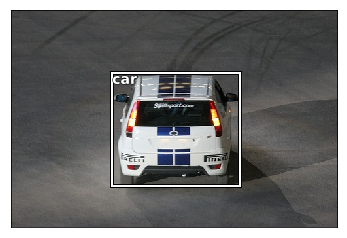

In [26]:
ax = show_img(im)
b = bb_hw(im0_a[0])
draw_rect(ax, b)
draw_text(ax, b[:2], cats[im0_a[1]])

In [27]:
def draw_im(im, ann):
    ax = show_img(im, figsize=(16,8))
    for b,c in ann:
        b = bb_hw(b)
        draw_rect(ax, b)
        draw_text(ax, b[:2], cats[c], sz=16)
def draw_idx(i):
    im_a = trn_anno[i]
    im = open_image(IMG_PATH/trn_fns[i])
    print(im.shape)
    draw_im(im, im_a)

(364, 480, 3)


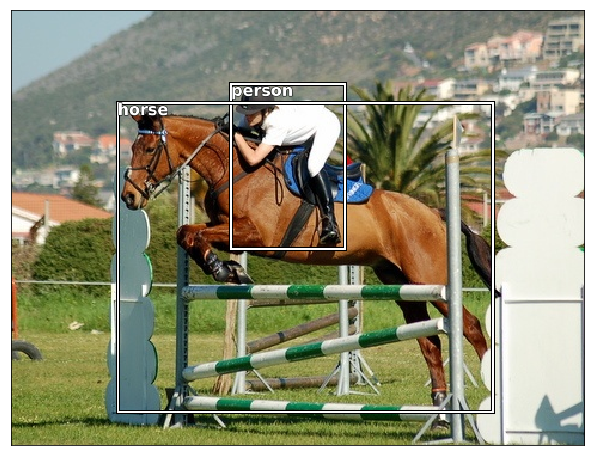

In [28]:
draw_idx(17)

functional analysis for supervised learning.

for example : a*X+b = Y

input space X  ,  output space Y

function space (a,b)


# Single object detection

## setting data for training the neural network

画像サイズ：224*224  モデル：resnet34

https://medium.com/@14prakash/understanding-and-implementing-architectures-of-resnet-and-resnext-for-state-of-the-art-image-cf51669e1624

In [29]:
f_model=resnet34
sz=224
bs=64

val_idxs = get_cv_idxs(len(trn_fns))

In [30]:
BB_CSV = PATH/'tmp/bb.csv'
CSV = PATH/'tmp/lrg.csv'

#### Target information (bounding box , category label) in CSV files

In [31]:
BB_CSV.open().readlines()[:5]

['fn,bbox\n',
 '000012.jpg,96 155 269 350\n',
 '000017.jpg,77 89 335 402\n',
 '000023.jpg,1 2 461 242\n',
 '000026.jpg,124 89 211 336\n']

In [32]:
CSV.open().readlines()[:5]

['fn,cat\n',
 '000012.jpg,car\n',
 '000017.jpg,horse\n',
 '000023.jpg,person\n',
 '000026.jpg,car\n']

## Data Augmentation for Overfitting Problem

予測精度を高めるために

In [33]:
tfm_y = TfmType.COORD
augs = [RandomFlip(tfm_y=tfm_y),
        RandomRotate(3, p=0.5, tfm_y=tfm_y),
        RandomLighting(0.05,0.05, tfm_y=tfm_y)]

In [34]:
tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO, tfm_y=TfmType.COORD, aug_tfms=augs)
md = ImageClassifierData.from_csv(PATH, JPEGS, BB_CSV, tfms=tfms,
    continuous=True, val_idxs=val_idxs)

In [35]:
md2 = ImageClassifierData.from_csv(PATH, JPEGS, CSV, tfms=tfms_from_model(f_model, sz))

In [36]:
class ConcatLblDataset(Dataset):
    def __init__(self, ds, y2): self.ds,self.y2 = ds,y2
    def __len__(self): return len(self.ds)
    
    def __getitem__(self, i):
        x,y = self.ds[i]
        return (x, (y,self.y2[i]))

#### We'll use it to add the classes to the bounding boxes labels.

In [37]:
trn_ds2 = ConcatLblDataset(md.trn_ds, md2.trn_y)
val_ds2 = ConcatLblDataset(md.val_ds, md2.val_y)

#### Training data information

In [38]:
trn_ds2[0][1]

(array([ 65.,  70., 177., 155.], dtype=float32), 6)

#### Validation data information

In [39]:
val_ds2[0][1]

(array([  0.,  49., 205., 180.], dtype=float32), 14)

In [40]:
md.trn_dl.dataset = trn_ds2
md.val_dl.dataset = val_ds2

###  Example from validation dataset : idx = 3 and drow the image , box , text

In [41]:
x,y=next(iter(md.val_dl))
idx=3
ima=md.val_ds.ds.denorm(to_np(x))[idx]
b = bb_hw(to_np(y[0][idx])); b

array([ 52.,  38., 107., 185.])

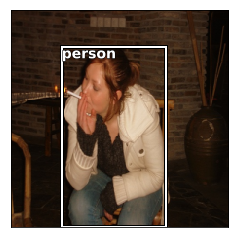

In [42]:
ax = show_img(ima)
draw_rect(ax, b)
draw_text(ax, b[:2], md2.classes[y[1][idx]])

# create neural network model
We need one output activation for each class (for its probability) plus one for each bounding box coordinate. We'll use an extra linear layer this time, plus some dropout, to help us train a more flexible model.

In [43]:
head_reg4 = nn.Sequential(
    Flatten(),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(25088,256),
    nn.ReLU(),
    nn.BatchNorm1d(256),
    nn.Dropout(0.5),
    nn.Linear(256,4+len(cats)),
)
models = ConvnetBuilder(f_model, 0, 0, 0, custom_head=head_reg4)

learn = ConvLearner(md, models)
learn.opt_fn = optim.Adam

**input image** : 224,224,3  
**Output data** : 24  (4 for top-left / bottorn-right box information , 20 for categories)

In [44]:
learn.get_layer_groups()

[[Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False),
  BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True),
  ReLU(inplace),
  MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1), ceil_mode=False),
  Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, aff

In [45]:
learn

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (2): ReLU(inplace)
  (3): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1), ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d

# loss function

#### L1 loss for the Bounding Box and Cross Entropy loss for the categories.

In [46]:
def detn_loss(input, target):
    bb_t,c_t = target
    bb_i,c_i = input[:, :4], input[:, 4:]
    bb_i = F.sigmoid(bb_i)*224
    # I looked at these quantities separately first then picked a multiplier
    #   to make them approximately equal
    return F.l1_loss(bb_i, bb_t) + F.cross_entropy(c_i, c_t)*20

def detn_l1(input, target):
    bb_t,_ = target
    bb_i = input[:, :4]
    bb_i = F.sigmoid(bb_i)*224
    return F.l1_loss(V(bb_i),V(bb_t)).data

def detn_acc(input, target):
    _,c_t = target
    c_i = input[:, 4:]
    return accuracy(c_i, c_t)

learn.crit = detn_loss
learn.metrics = [detn_acc, detn_l1]

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 97%|█████████▋| 31/32 [00:09<00:00,  3.37it/s, loss=645]


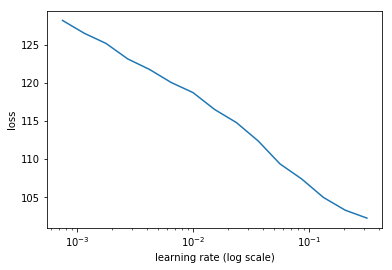

In [48]:
#learn.lr_find()
#learn.sched.plot()

In [51]:
lr=1e-2

In [50]:
#learn.fit(lr, 1, cycle_len=3, use_clr=(32,5))

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   detn_acc   detn_l1       
    0      74.077743  44.902697  0.796      32.266542 
    1      53.083812  36.2031    0.832      25.348214     
    2      44.295413  35.04185   0.834      24.370367     



[array([35.04185]), 0.8339999995231628, 24.370366668701173]

### Fine-tuning the model

In [51]:
#learn.freeze_to(-2)

In [52]:
lrs = np.array([lr/100, lr/10, lr])

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 91%|█████████ | 29/32 [00:15<00:01,  1.89it/s, loss=194] 

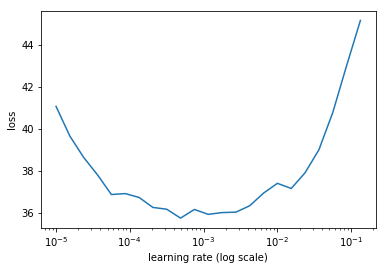

In [53]:
#learn.lr_find(lrs/1000)
#learn.sched.plot(0)

In [54]:
# learn.fit(lrs/5, 1, cycle_len=5, use_clr=(32,10))

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

  0%|          | 0/32 [00:00<?, ?it/s]
epoch      trn_loss   val_loss   detn_acc   detn_l1       
    0      36.886328  36.599246  0.768      22.318767 
    1      31.275464  32.648204  0.83       21.149654     
    2      27.122337  31.472838  0.828      20.370993     
    3      23.840516  30.954318  0.84       19.814638     
    4      21.364164  30.553236  0.844      19.772876     



[array([30.55324]), 0.8440000014305115, 19.77287582397461]

In [52]:
#learn.save('reg1_1')

In [53]:
#learn.load('reg1_1')

In [55]:
#learn.unfreeze()

In [56]:
#learn.fit(lrs/10, 1, cycle_len=10, use_clr=(32,10))

HBox(children=(IntProgress(value=0, description='Epoch', max=10), HTML(value='')))

epoch      trn_loss   val_loss   detn_acc   detn_l1       
    0      18.46977   31.424723  0.826      20.010818 
    1      18.147771  31.688481  0.828      19.952495     
    2      17.495147  31.507145  0.834      19.364103     
    3      16.540376  31.148945  0.826      18.705009     
    4      15.732843  29.895074  0.838      18.478283     
    5      15.046849  30.182939  0.828      18.425518     
    6      14.289118  30.391879  0.824      18.539497     
    7      13.683398  30.343648  0.832      18.334833     
    8      13.16171   30.381075  0.832      18.304394     
    9      12.707077  30.321962  0.836      18.194718     



[array([30.32196]), 0.8359999980926514, 18.19471848297119]

In [115]:
#learn.save('reg100')

/home/yanhua/Documents/jupyter/fastai/courses/dl2/data/pascal/models

In [47]:
learn.load('reg100')

# Testing the model 

In [48]:
from scipy.special import expit

## Chose input image from validation dataset

In [49]:
x,_ = next(iter(md.val_dl))

choice id number in the data set

In [50]:
idx=5
ima=md.val_ds.ds.denorm(to_np(x))[idx]

#### Show the input image data 3,224,224

In [51]:
x[idx]


( 0 ,.,.) = 
  8.8663e-02  8.2464e-02  1.0661e-01  ...  -1.1100e+00 -1.0586e+00 -1.0675e+00
  1.0606e-01  8.9380e-02  1.2278e-01  ...  -1.0719e+00 -1.0653e+00 -1.0792e+00
  1.1915e-01  1.2930e-01  1.3195e-01  ...  -1.0439e+00 -1.0786e+00 -1.0801e+00
                 ...                   ⋱                   ...                
 -1.7478e+00 -1.7841e+00 -1.8323e+00  ...   2.4248e-01  8.1890e-02  3.4099e-02
 -1.8302e+00 -1.8701e+00 -1.7760e+00  ...   1.3420e-01  1.7595e-01  2.1784e-01
 -1.9164e+00 -1.7756e+00 -1.8318e+00  ...   1.8719e-01  1.8728e-01  1.9816e-01

( 1 ,.,.) = 
  5.1773e-01  5.1139e-01  5.3607e-01  ...  -8.5466e-01 -8.4471e-01 -8.6281e-01
  5.3551e-01  5.1846e-01  5.5260e-01  ...  -8.5562e-01 -8.3053e-01 -8.3360e-01
  5.4889e-01  5.5927e-01  5.5843e-01  ...  -8.5915e-01 -8.4244e-01 -8.0180e-01
                 ...                   ⋱                   ...                
 -1.6124e+00 -1.6270e+00 -1.6515e+00  ...   5.5865e-01  3.8761e-01  3.2036e-01
 -1.6554e+00 -1.7237e+00

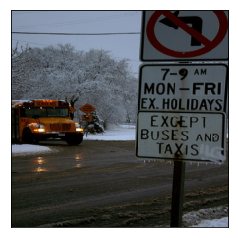

In [52]:
ax = show_img(ima)

# Create the predictor

In [53]:
y = learn.predict()

### Input image and get bounding box 

In [54]:
bb = expit(y[idx][:4])*224
b = bb_hw(bb)

### input image and get text label 

In [55]:
c = np.argmax(y[idx][4:])
c

6

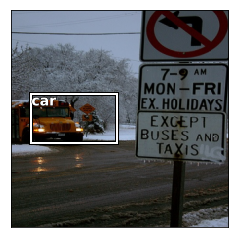

In [56]:
ax = show_img(ima)
draw_rect(ax, b)
draw_text(ax, b[:2], md2.classes[c])

## input image

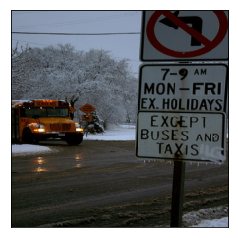

In [67]:
idx=5
ima=md.val_ds.ds.denorm(to_np(x))[idx]
ax = show_img(ima)

## Object Detection and Getting Label of Prediction

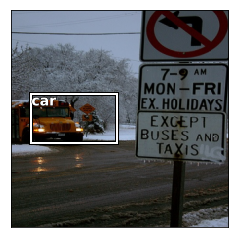

In [68]:
bb = expit(y[idx][:4])*224
b = bb_hw(bb)
c = np.argmax(y[idx][4:])
ax = show_img(ima)
draw_rect(ax, b)
draw_text(ax, b[:2], md2.classes[c])

In [ ]:
y = learn.predict()
x,_ = next(iter(md.val_dl))

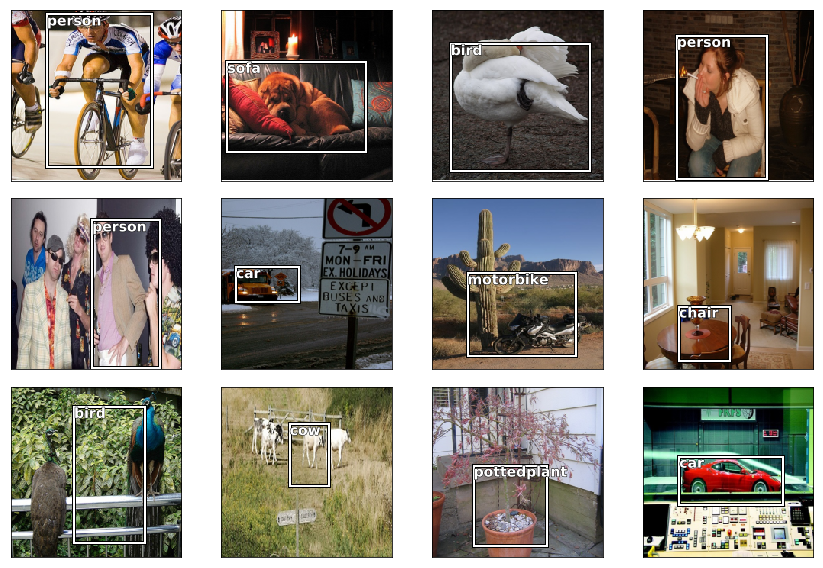

In [118]:
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
for i,ax in enumerate(axes.flat):
    ima=md.val_ds.ds.denorm(to_np(x))[i]
    bb = expit(y[i][:4])*224
    b = bb_hw(bb)
    c = np.argmax(y[i][4:])
    ax = show_img(ima, ax=ax)
    draw_rect(ax, b)
    draw_text(ax, b[:2], md2.classes[c])
plt.tight_layout()